In [1]:
#Tensorflow 
#google이 만들었다. ML을 위한 library(python, C ... 근데 자바는 없어)
#사용자가 많다. 기능이 쉽고 사용하기 편하다. 
#Tensorflow를 이용해보자. 
#Hello world 출력

In [2]:
import tensorflow as tf

#tensorflow의 구성요소(3 가지)

#1. node : 수학적인 연산을 담당. 데이터의 입출력을 담당.

my_node = tf.constant("Hello World") #constant 상수,하나의 노드 안에 간직. 

print(my_node) #0번째 상수, 모양은 (), 타입은 str
#shape  -> (3,) 1차원이고 배열이 3개 있다. 
#(3,4) 2차원이고 데이터 12개
#() 차원이 없다. scalar 하나의 문자열이야. 
#상수 만들어나가면 const올라감. 

#2. Tensor: 다차원 array(matrix) , tensor가 data

#3. Edge : 하나의 line 한 node가 가진 tensor를 다른 node로 이동시키는 역할

#세 요소로 구성된 그래프를 그릴 수 있게 한다. 그래프로 특정 값 도출 

#runner(Session)가 특정 node를 실행시켜준다. 

sess = tf.Session() #session, runner(Node를 실행시킴)

print(sess.run(my_node)) #b.는 byte계열의 문자열임을 알린다. 
print(sess.run(my_node).decode())

Tensor("Const:0", shape=(), dtype=string)
b'Hello World'
Hello World


In [3]:
#수학 계산을 하기 위한 OpenSource Library 
#수치 계산에 특화. 
#Data flow graphs는 Node와 Edge로 구성된 방향성 있는 그래프로 표현


In [4]:
import tensorflow as tf
import numpy as np
node1 = tf.constant(10,dtype = tf.float32) #상수
#node1 = tf.constant(10,dtype = np.float64)도 가능
node2 = tf.constant(20,dtype = tf.float32)

node3 = node1 + node2 #tf.add(node1,node2)가 정형화된 표현
#노드3은 노드 1, 2와 각각 엣지로 연결되어 있다. 
sess = tf.Session()

sess.run([node1,node2,node3])

[10.0, 20.0, 30.0]

In [5]:
#placeholdere 데이터를 받아들이는 그릇, 입력 parameter
import tensorflow as tf

node1 = tf.placeholder(dtype = tf.float32) 
#int는 데이터 유실 위험이 있다. 
node2 = tf.placeholder(dtype = tf.float32) 

node3  = node1 + node2

sess = tf.Session()
sess.run(node3, feed_dict={node1:100,node2:input()})#딕셔너리 형태로 먹이 주기.
# dict value에 list가 들어갈 수 있다. 각각 위치의 원소끼리 합을 구해줌. 

22


122.0

In [6]:
sess.run(node3, feed_dict={node1:[1,2,3],node2:[1,2,3]})

array([2., 4., 6.], dtype=float32)

In [7]:
import tensorflow as tf
node1 = tf.constant(3, dtype = tf.float32)

node1 #8번째 만든 상수 실행 또 하면 늘어남. 

<tf.Tensor 'Const_3:0' shape=() dtype=float32>

In [8]:
node1 = tf.constant([1,2,3], dtype = tf.float32)

node1 #1차원이고, 값이 3 개가 있어. .

<tf.Tensor 'Const_4:0' shape=(3,) dtype=float32>

In [9]:
# 간단한 linear regression을 이용한 machin learning
import tensorflow as tf

#training data set

x = [1,2,3] #독립 변수 입력데이터
y = [1,2,3] #종속 변수 입력데이터의 label

#Weight &bias정의 , 이것을 구하는 것이 목표이기도 함. 
#내부적으로 변해야 하니 상수로 표현할 수 없다. 변수로 표현. 
W = tf.Variable(tf.random_normal([1]), name = "weight") #초기값을 난수로 지정할 것. 
#normar 정규분포, uniform 균등분포.
#배열형태로 몇 개 추출할지 알려줌. 2차원 이상의 함수에서는 숫자 증가하겠다. 
b = tf.Variable(tf.random_normal([1]), name = "bias")

#Hyporthesis #최종적으로 알아내야 하는 직선. 
#실 데이터에 가장 인접한 직선, 예측 모델을 만들 수 있으니 예측 가능. 
H = W* x + b 

#최소제곱법을 이용. 

#Cost function(Loss function,비용함수) 최소가 되는 w와 b값을 구한다. 
cost = tf.reduce_mean(tf.square(H - y)) #평균 값 구하기#안의 값을 각각 제곱해 #(list - list)

# 라이브러리 미분 계산 해줌. 
#cost function의 minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #최소값을 찾는 알고리즘 중의 하나
#경사 하강 가장 빠르게 경사를 내려가는 알고리즘. 범위를 지정하여 그 내에서 가장 낮은 경사로 감. 

train = optimizer.minimize(cost) #완전히 최소화 아님. 현재 코스트 값에서 최소화 #반복 수행필요

#그래프를 실행시키기 위한 Session
sess = tf.Session()
#Variable을 사용할 경우 초기화를 해야한다. 반드시...전역변수초기화 해야함. 
sess.run(tf.global_variables_initializer())
#train실행 cost감소. 각 노드가 가진 값은 알아볼 수 없음. 
    #노드를 각각 실행#train은 return값이 필요 없다. 목적은 cost와 w, b 도출
for step in range(3000):
    _,W_val, b_val, cost_val = sess.run([train,W,b,cost])  
    if step % 300  == 0: #300번마다 한번씩 출력하겠어. 
        print("W:{},b:{},cost:{}".format(W_val,b_val,cost_val))

W:[1.2704906],b:[0.37408394],cost:1.1193331480026245
W:[0.95432824],b:[0.10382266],cost:0.0015537963481619954
W:[0.9778146],b:[0.05043255],cost:0.00036663413629867136
W:[0.98922336],b:[0.02449784],cost:8.65092733874917e-05
W:[0.9947652],b:[0.01189992],cost:2.0413017409737222e-05
W:[0.9974572],b:[0.00578036],cost:4.816374712390825e-06
W:[0.9987648],b:[0.00280788],cost:1.1365410728103598e-06
W:[0.9993998],b:[0.00136427],cost:2.6827123633665906e-07
W:[0.9997081],b:[0.0006633],cost:6.342374803125495e-08
W:[0.99985796],b:[0.00032287],cost:1.5033075229098358e-08


In [10]:
#training data set
x_data = [1,2,3]
y_data = [3,5,7]

#placeholder
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

H = W* x + b 

cost = tf.reduce_mean(tf.square(H - y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) 

train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(3000):
    _,W_val, b_val, cost_val = sess.run([train,W,b,cost]
                                       ,feed_dict={x:x_data,y:y_data})  
    if step % 300  == 0: 
        print("W:{},b:{},cost:{}".format(W_val,b_val,cost_val))
#prediction    
sess.run(H,feed_dict={x:10})

W:[1.075298],b:[0.59411997],cost:7.155900478363037
W:[1.9998388],b:[1.0003659],cost:1.927924131450709e-08
W:[1.999921],b:[1.0001799],cost:4.658128549550611e-09
W:[1.9999607],b:[1.0000902],cost:1.1663511267911986e-09
W:[1.9999801],b:[1.000045],cost:2.940888921276752e-10
W:[1.9999869],b:[1.0000291],cost:1.2120911219160035e-10
W:[1.9999869],b:[1.0000291],cost:1.2120911219160035e-10
W:[1.9999869],b:[1.0000291],cost:1.2120911219160035e-10
W:[1.9999869],b:[1.0000291],cost:1.2120911219160035e-10
W:[1.9999869],b:[1.0000291],cost:1.2120911219160035e-10


array([20.999897], dtype=float32)

In [11]:
#Linear Regression y label이 연속적인 값일 때 (점수 등)값의 범위 중 하나씩
# Multinomial을 가장 많이 씀. y label이 범주형 값. ABCD
# Logistric Regression y label 0과 1

# 회귀 분석 통계학 자료분석 방법.다른 방법과 달리 특정 조건 없음.  
# 관찰된 자료들이 연관성이 있지 않나, 변수들 사이의 경향성을 파악한 뒤 예측
# 흡연량과 음주량이 관계가 있냐 없냐
# 범주로 관련 알아내기 카이 제곱
# 두 집단 연관 독립표본 t 검정
# 범주 3개 이상 아노바 검증 



cost:335.93927001953125
cost:7.206094264984131
cost:5.889610767364502
cost:4.934849739074707
cost:4.2424211502075195
cost:3.740248203277588
cost:3.3760552406311035
cost:3.1119275093078613
cost:2.920372724533081
cost:2.781451463699341


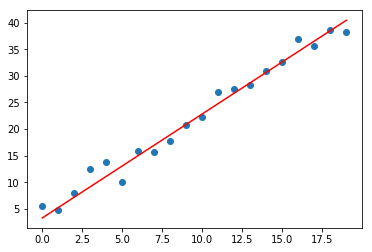

array([32.635666], dtype=float32)

In [26]:
%matplotlib inline
#    기본적인 Linear Rgression 예제
import tensorflow as tf #tensorflow module을 불러들여요
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
#training data set
x_data = np.arange(0,20,1)
y_data = np.array([ t*2 + np.random.normal(2,2) for t in x_data])
#표준화 , #일반화
plt.scatter(x_data, y_data) #데이터 분포 확인

#plcaceholder
X = tf.placeholder(dtype = tf.float32)
Y = tf.placeholder(dtype = tf.float32)

#Weight & bias

w = tf.Variable(tf.random_normal([1]) , name = "weight") #대괄호
b = tf.Variable(tf.random_normal([1]), name = "bias")

#Hypothesis
H = W*X+b
#전체적인 순서를 기억해라.  

#cost function
cost = tf.reduce_mean(tf.square(H-Y))

#train 
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

#session, 해당 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습 w와 b값을 조정해가는 과정
for step in range(3000):#epoch  - train data를 한 번 이용하는 것
    _, cost_val = sess.run([train,cost],feed_dict= {X:x_data, Y:y_data}) #두 개의 값을 튜플로 받기 위해.
    if step % 300 == 0:
        print("cost:{}".format(cost_val))
        
#입력데이터에 대한 처리가 이루어져야 정상적으로 학습이 진행. 

#만약 학습이 정상적으로 이루어졌으면, w,b 값이 결정된다. 
x_line = np.arange(0,20,1)
y_line = np.array([sess.run(W)*t+sess.run(b) for t in x_line])
plt.plot(x_line, y_line,"r")
plt.show()

#Prediction
sess.run(H, feed_dict= {X:15})

In [27]:
#미분 곡선에 접하는 직선의 기울기., 최저값에서는 기울기 0
# W값을 줄여가면서 기울기 0
# 기울기 크면 많이 줄이고, 보정치가 작을수록 w,b가 천천히 움직인다. 



cost:1.8124563694000244
cost:0.025654824450612068
cost:0.02339991182088852
cost:0.02206820249557495
cost:0.021281620487570763
cost:0.020817015320062637
cost:0.02054258994758129
cost:0.020380500704050064
cost:0.020284758880734444
cost:0.020228207111358643


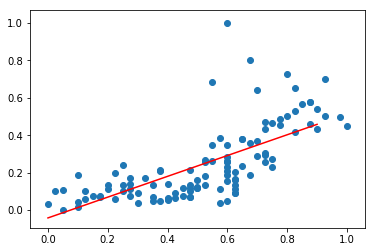

In [84]:
##Ozone data를 이용한 linear regression

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

##1. Data Loading
data0 = pd.read_csv("./Data/Ozone/ozone.csv", sep = ",")

#2. Training dataset
data=data0.dropna(how = "any", inplace = False)
x_data = pd.DataFrame(data, columns = ["Temp"])
x_data = (x_data - x_data.min())/(x_data.max() - x_data.min())

y_data = pd.DataFrame(data, columns = ["Ozone"])
y_data = (y_data - y_data.min())/(y_data.max() - y_data.min())


plt.scatter(x_data,y_data)

##Normalization, Standardization

#standardization : (현재 값 - 평균 )/표준편차 -> 0~1 사이의 값으로 치환
#normalization : (현재값 - 최소값) / (최대값 - 최소값) -> 0~1사이의 값으로 정규분포 형태로 치환. 
#이상치 변형 필요
#3. placeholder
X = tf.placeholder(dtype = tf.float32)
Y = tf.placeholder(dtype = tf.float32,)

#4. Weight &bias
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#5. Hypothesis
H = W*X + b

#6. cost function
cost = tf.reduce_mean(tf.square(H-Y))

#7. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

#8. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#9. 학습 W와 b값을 조정해가는 과정
for step in range(3000):
    _,cost_val = sess.run([train,cost],feed_dict = {X:x_data, Y:y_data})
    if step % 300 == 0:
        print("cost:{}".format(cost_val))
              
#10.Prediction
sess.run(H,feed_dict ={X:69})


x_line = np.arange(0.0,1.0,0.1)
y_line = np.array([sess.run(W)*t+sess.run(b) for t in x_line])
plt.plot(x_line, y_line,"r")
plt.show()



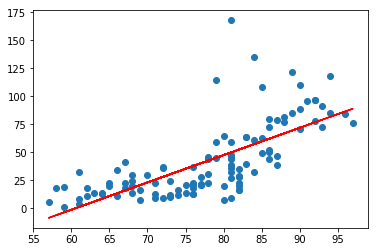

In [45]:
%matplotlib inline #아웃풋 그대로 출력
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

#Data Loading
data = pd.read_csv("./Data/Ozone/ozone.csv",sep=",")
df = data.dropna(how ="any", inplace = False)

x = df["Temp"]
y = df["Ozone"]

result = stats.linregress(x,y)
result #slope 기울기, #intercept 절편, #rvalue 상관계수 (0~1), #pvalue 
W = result[0]
b = result[1]

plt.scatter(x,y)
plt.plot(x,W*x + b, "r")
plt.show()

In [56]:
x_data =[[78, 80, 75]
        ,[93, 88, 93]
        ,[96, 98, 100]
         ,[73, 66, 70]]
y_data = [[152], [185], [180],[196],[142]]
x = tf.placeholder(shape = [None,3], dtype=tf.float32) #열은 모르고 행의 갯수만 3개로 고정. 
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name ="bias")

H = tf.matmul(X,W) + b #wx면 행렬 곱 자체가 안일어난다. 숫자 중요
H          
             
        

<tf.Tensor 'add_17:0' shape=(?, 1) dtype=float32>

In [124]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

#1. Data Loading
data = pd.read_csv("./Data/Ozone/ozone.csv",sep=",")
df = data.dropna(how ="any", inplace = False)

#2. Training Dataset, Standardization
x = df[["Solar.R", "Wind", "Temp"]]
y = df["Ozone"]
y_data = pd.DataFrame(y, columns = ["Ozone"])
y_data = (y_data - y_data.min())/(y_data.max() - y_data.min())
# 하나의 열만 뜯어오면 Series . 이때는 y_data = y_data.values.reshape(-1,1) #원하는 컬럼의 values뽑아옴. reshape으로 변경

display(data.head())
x1_data = pd.DataFrame(x, columns = ["Solar.R"])
x1_data = (x1_data - x1_data.min())/(x1_data.max() - x1_data.min())

x2_data = pd.DataFrame(x, columns = ["Wind"])
x2_data = (x2_data - x2_data.min())/(x2_data.max() - x2_data.min())

x3_data = pd.DataFrame(x, columns = ["Temp"])
x3_data = (x3_data - x3_data.min())/(x3_data.max() - x3_data.min())

x_data = pd.concat([x1_data, x2_data,x3_data ], axis=1)

#3. placeholder #데이터를 받아들이는 그릇
X = tf.placeholder(dtype = tf.float32, shape = [None,3])
Y = tf.placeholder(dtype = tf.float32, shape = [None,1]) #matrix 표현 shape = [None,1]

#4. Weight &bias
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#5. Hypothesis
H = tf.matmul(X,W) + b 
#6. cost function
cost = tf.reduce_mean(tf.square(H-Y))
#7. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)
#8. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#9. 학습 W와 b값을 조정해가는 과정
for step in range(5000):
    _,cost_val = sess.run([train,cost],feed_dict = {X:x_data, Y:y_data})
    if step % 500 == 0:
        print("cost:{}".format(cost_val))
#10. 검증        
sess.run(H,feed_dict ={X:[[190,7.4,67]]}) #[[190,7.4,67]] 1행, 3열인 2차원 배열 cf. [190,7.4,67] 1차원 배열
#head 내용을 보고, 값을 직접 입력하여 결과값이 비슷한지 확인하기. 
# X, Y 값을 넣을 때 처음에 지정한 shape에 맞춰서 넣어야 한다. 

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


cost:4.3129801750183105
cost:0.1171920895576477
cost:0.049510423094034195
cost:0.03120347671210766
cost:0.024810031056404114
cost:0.021765483543276787
cost:0.019939634948968887
cost:0.018708962947130203
cost:0.017837906256318092
cost:0.017209192737936974


array([[56.093258]], dtype=float32)

In [130]:
from sklearn.preprocessing import MinMaxScaler

##data loading
data = pd.read_csv("./Data/Ozone/ozone.csv",sep = ",")
df = data.dropna(how="any", inplace= False)

#2. training data set
x_data = MinMaxScaler().fit_transform(
df[["Solar.R","Wind","Temp"]].values)
y_data = MinMaxScaler().fit_transform(
df["Ozone"].values.reshape(-1,1))

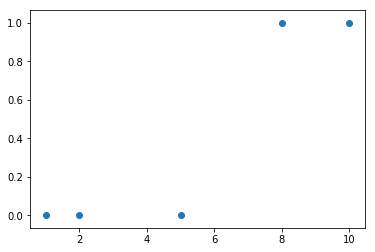

In [6]:
## Simple Linear Regression
#입력파라메터가 하나 

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

#training data set
x_data = [1,2,5,8,10]
y_data = [0,0,0,1,1]

#placegoldat
X = tf.placeholder(dtype = tf.float32)
Y = tf.placeholder(dtype = tf.float32)

#weigt &vias

W = tf.Variable(tf.random_normal([1]),"ranege")
b = tf.Variable(tf.random_normal([1]),"bias")

plt.scatter(x_data,y_data)


Tensor("Mean:0", shape=(), dtype=float32)
cost:41.55413055419922
cost:0.05295196920633316
cost:0.043799035251140594
cost:0.04354467988014221
cost:0.04353762045502663
cost:0.04353741928935051
cost:0.04353741183876991
cost:0.04353741556406021
cost:0.04353741928935051
cost:0.04353741928935051


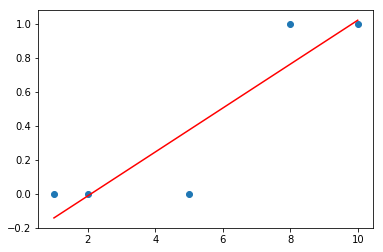

array([5.973681], dtype=float32)

In [1]:

#딥러닝과 머신러닝은 로지스틱으로 함 리니어는 여기 까지오기위한 과정 이해도움 뿐
#리니어 리그레이션 다시


%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt #실제 그림을 그리기위함
import tensorflow as tf
from scipy import stats
#입력 값이 simple linear regression

#학습데이터 준비 training datas set
x_data=[10,8,5,2,1]
y_data=[1,1,0,0,0]

#플레이스 홀더 입력공간을 준비 플레이스홀더에 데이터를 맵핑시켜서 쓰는것


x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)


#weight & bias 준비 내부적으로 값이 계속 변해서 변수로

#초기 w,b값은 난수하나씩

w=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")


h=w*x+b

#비용함수 cost function -> 최소 제곱법 ,공분산과 최소어쩌고도 있는데 최소 제곱법을 주로사용
#기본적인 최소 제곱법같은 원리를 알아야함
#이 코스트 함수가 2차함수 모양이됨 맨 아래 점을 찾아야함
cost=tf.reduce_mean(tf.square(h-y))
print(cost)

#이 최소제곱법이 가장 작은수가 우리가 찾는 결과값이 됨
#상황에따라 learning_rate 값이 달라짐
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#print(cost)


#세션 초기화 -> 런을 만들고 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={x:x_data , y:y_data})
    
    if step%300==0 :
        print("cost:{}".format(cost_val))



plt.scatter(x_data,y_data)
plt.plot(x_data,sess.run(w)*x_data+sess.run(b), "r")
plt.show()
        

x=(0.5-sess.run(b))/sess.run(w)
x


#큰값이 들어가게되면 리니어 레그레이션으로는 오류가 발생함  

#그래서 로지스틱을 쓰게됨

#sigmoid function 이용해서 하이파시스가 바뀜

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


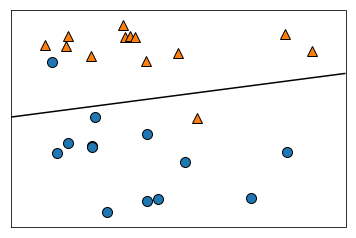

In [14]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn # sample data를 가져오기위한 유틸리티 

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt #실제 그림을 그리기위함
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.linear_model import LogisticRegression




warnings.filterwarnings(action="ignore")



#x: x파라미터 2개
#y: label(0 or 1)
x,y=mglearn.datasets.make_forge()

print(x)
print(y)
 #0값이면 동그라미 1값이면 세모
mglearn.discrete_scatter(x[:,0],x[:,1],y)
model = LogisticRegression()

clf=model.fit(x,y)

mglearn.plots.plot_2d_separator(clf,x,fill=False , eps=0.5)


In [12]:
#data loading
#데이터 로딩 후 전처리 과정

#training data set(2차원 matrix)
import tensorflow as tf
x_data = [[10,0]
         ,[8,1]
         ,[3,3]
         ,[2,3]
         ,[5,1]
         ,[2,0]
         ,[1,0]]
y_data = [[1],[1],[1],[1],[0],[0],[0]]

#placegolder
X = tf.placeholder(shape = [None,2], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

##weight & bias
W  = tf.Variable(tf.random_normal([2,1]), name = "weight")
b  = tf.Variable(tf.random_normal([1]), name = "bias")
#행렬 곱이 일어나려면, XW + b = y  x의 열과 w의 행의 길이가 같아야 한다. 
#Y의 열과 같은 형태로 나와야 한다. 

#hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit) #sigmoid 함수로 바꿀 수 있다. 

#Cost function
#cost = -tf.reduce_mean (y*tf.log(H)+(1-Y)*tf.log(1-H)) 
#지수함수 형태를 로그 형태로 바꾼 식을 쓸 것이다. 식 외우기 어려우니까. 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = Y))
#H가 들어가지 않음. 가설 들어가지 않음, 그리고 y측 label 넣음. 

#train node
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict= {X: x_data, Y:y_data})
    if step %300 == 0:
        print("cost:{}".format(cost_val))
        
#accuracy 모델 정확도 측정
predict = tf.cast(H>0.5, dtype = tf.float32) #boolean값을 실수로 바꾼다. 
correct = tf.equal(predict, Y) #place홀더 값과 예측값을 비교
accuracy = tf.reduce_mean(tf.cast(correct,dtype = tf.float32))

print("정확도:{}".format(sess.run(accuracy, feed_dict = {X:x_data, Y:y_data})))


#prediction
print("예측값 : {}".format(sess.run(predict, feed_dict = {X:[[7,1]]})))

cost:1.2783327102661133
cost:0.4133140742778778
cost:0.36480599641799927
cost:0.3411247432231903
cost:0.32351645827293396
cost:0.30918216705322266
cost:0.2971417307853699
cost:0.28684064745903015
cost:0.2779015004634857
cost:0.27004972100257874
정확도:0.8571428656578064
예측값 : [[1.]]


In [17]:
##Titanic분석

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#1. DataLoading
data = pd.read_csv("./Data/Titanic/titanic_data.csv", sep=",")
data_x = data[["Sex","Age","Pclass","Fare"]]
data_y = data["Survived"]

Pclass_dummies = pd.get_dummies(data_x["Pclass"], prefix = "Pclass")

data_x = data_x.join(Pclass_dummies)
data_x.drop("Pclass",axis = 1, inplace =True)
Sex_dummies = pd.get_dummies(data_x["Sex"], prefix="Sex")

data_x = data_x.join(Sex_dummies)
data_x.drop("Sex",axis = 1, inplace =True)

#2. Training data set
x_data  = MinMaxScaler().fit_transform(data_x.values)

y_data = data_y.values.reshape(-1,1)

#3. PlaceHolder
#x_data.shape #(891, 7)
X = tf.placeholder(shape = [None,7], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

#4. Weight & bias
W = tf.Variable(tf.random_normal([7,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#5. Hypothesis
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)

#6. Cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = Y))

#7. Train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)


#8.session , 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#9. 학습
for step in range(10000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0:
        print("Cost:{}".format(cost_val))
        
#10. accuracy 측정
predict = tf.cast(H>0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("정확도 :{}".format(sess.run(accuracy, feed_dict = {X:x_data, Y:y_data})))
#학습용 데이터로 진행함. 임시..
#원래 평가는 다른 데이터로 해야한다. 

Cost:0.7010467648506165
Cost:0.49845418334007263
Cost:0.46698907017707825
Cost:0.4583192765712738
Cost:0.4554075598716736
Cost:0.4543032646179199
Cost:0.4538367688655853
Cost:0.45361289381980896
Cost:0.45348694920539856
Cost:0.453402578830719
정확도 :0.7890011072158813


In [90]:
##Admission 분석
# 주어진 데이터의 70%를 train으로 사용하고 나머지 30%를 검증용으로 사용
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
import statsmodels.api as sm

warnings.filterwarnings(action="ignore")
#     import statsmodels.api as sm  
#logit = sm.Logit(data_y,data_x)
#result = logit.fit()
#result.predict(data_x)
    # 1. Data Loading
data = pd.read_csv("./Data/Admission/admission.csv",sep=",")
data = data.dropna(how="any", inplace= False)
data.head()
data_x = data[["gre","gpa","rank"]]
data_y = data["admit"]
data_y = pd.DataFrame(data_y,columns = ["admit"])

rank_dummies = pd.get_dummies(data_x["rank"], prefix ="rank")

data_x = data_x.join(rank_dummies)
data_x.drop("rank", axis = 1, inplace = True)

#nomalization

data_x = MinMaxScaler().fit_transform(data_x[["gre", "gpa","rank_1","rank_2","rank_3","rank_4"]].values)
data_y = MinMaxScaler().fit_transform(data_y["admit"].values.reshape(-1,1))
    # 2. Training data set
# 학습용, 테스트용 데이터 분할
rows,_ = data_x.shape
Tr_x = data_x[:int(rows*0.7)]
Te_x = data_x[int(rows*0.7):]


rows,_ = data_y.shape
Tr_y = data_y[:int(rows*0.7)]
Te_y = data_y[int(rows*0.7):]


#3. PlaceHolder
# Tr_x .shape #(280, 6)
X = tf.placeholder(shape = [None,6], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

#4. Weight & bias
W = tf.Variable(tf.random_normal([6,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#5. Hypothesis
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)

#6. Cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = Y))


#7. Train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)


#8. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#9. 학습
for step in range(10000):
    _,cost_val = sess.run([train,cost], feed_dict={X:Tr_x, Y:Tr_y})
    if step % 1000 == 0:
        print("Cost:{}".format(cost_val))
        
        #10. accuracy 측정
predict = tf.cast(H>0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("정확도 :{}".format(sess.run(accuracy, feed_dict = {X:Te_x, Y:Te_y})))


Cost:2.3125832080841064
Cost:0.592378556728363
Cost:0.5711947679519653
Cost:0.560520350933075
Cost:0.5548760294914246
Cost:0.551819384098053
Cost:0.5501300096511841
Cost:0.5491806268692017
Cost:0.5486397743225098
Cost:0.5483285188674927
정확도 :0.6916666626930237


In [3]:
import statsmodels.api as sm 
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading 
data=pd.read_csv("./Data/Admission/admission.csv", sep=",")  #sep="," default값
data_x = data[["gre","gpa","rank"]]  #sex는 값들이 문자, pclass는 낮은 숫자가 가중치가 높음 => 바꿔줘야 함
data_y = data["admit"]

rank_dummies = pd.get_dummies(data_x["rank"],prefix="rank") #특정컬럼에 대해 더미 컬럼을 얻을 수 있음
data_x=data_x.join(rank_dummies)
data_x.drop("rank", axis=1, inplace=True)   #inplace=True 원본을 지워라, axis=1열방향

logit = sm.Logit(data_y,data_x)  #모델생성
result=logit.fit() #학습과정
result.predict(data_x)  #예측

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


0      0.172627
1      0.292175
2      0.738408
3      0.178385
4      0.118354
5      0.369970
6      0.419246
7      0.217003
8      0.200735
9      0.517868
10     0.374314
11     0.400200
12     0.720539
13     0.353455
14     0.692380
15     0.185825
16     0.339939
17     0.078953
18     0.540228
19     0.573512
20     0.161221
21     0.437271
22     0.128375
23     0.192049
24     0.437594
25     0.682295
26     0.578481
27     0.204754
28     0.423073
29     0.458299
         ...   
370    0.398574
371    0.317087
372    0.376508
373    0.530854
374    0.411424
375    0.187357
376    0.415124
377    0.589590
378    0.202240
379    0.218961
380    0.463667
381    0.346029
382    0.349677
383    0.672759
384    0.186651
385    0.351893
386    0.528429
387    0.342879
388    0.339081
389    0.402750
390    0.400936
391    0.487194
392    0.222029
393    0.438725
394    0.253423
395    0.488670
396    0.165504
397    0.181062
398    0.463667
399    0.300731
Length: 400, dtype: floa

In [ ]:
#머신러닝
#supervised learning(지도학습)
#-training data set에 label이 붙어 있음
#1.simple linear regression : 독립변수 한개(입력 파라미터 한개), hypothesis = w*x+b, cost function =>정확도를 알 수 없음
#2.mutiple linear regression : 독립변수 여러개(입력 파라미터 두개 이상), hypothesis =  x*w+b  =>정확도를 알 수 없음
#3.logistic regression(lable이 0 or 1) : 실제로 현실에서 많이 이용됨, 정확도를 측정할 수 있음(accuracy),다른말로 binary classification, 
#                                       H= sigmoid(w*x+b)
#4.multinomial classification
#둘중에 하나를 선택하는 선(ex A/BC  B/AC  C/AB) 여러개의 logistic이 합쳐져 있는 것
#어떤 값이 될 확률이 높은가를 나타냄

#unsupervised learning(비지도학습)
#-training data set에 label이 붙어있지 않음

In [6]:
#Multinomial Classification
import tensorflow as tf
#1.data loading
#2.training data set
x_data = [[10,7,8,5],
         [8,8,9,4],
         [7,8,2,3],
         [6,3,9,3],
         [7,5,7,4],
         [3,5,6,2],
         [2,4,3,1]]
y_data = [[1,0,0],                   #[A,B,C]  = A위치가 1이기에 A를 나타냄
         [1,0,0],
         [0,1,0],                   #[A,B,C]  = B위치가 1이기에 B를 나타냄
         [0,1,0],
         [0,1,0],
         [0,0,1],
         [0,0,1],]        

#placeholder
X=tf.placeholder(shape=[None,4], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)


#weight & bias
W =tf.Variable(tf.random_normal([4,3]), name="weight")
b =tf.Variable(tf.random_normal([3]), name="bias")

#Hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

#Cost(Loss) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)   #w값을 얼마만큼 줄여나갈것인가

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #변수 초기화

#학습
for step in range(3000):         #데이터가 작으니 많이 돌릴 수 있음'ㅅ'
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if step % 300 == 0:
        print(cost_val)


#Accuracy
#predict = H
#H => [[0.3  0.6  0.1]] 형태로 나타남

predict = tf.argmax(H,1)        #가장 큰 값의 인덱스를 알려줌
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:x_data,Y:y_data}) )

#예측
result=sess.run(predict, feed_dict={X:[[5,3,9,4]]})
if result[0] == 0:
    print("A")
elif result[0] == 1:
    print("B")
else:
    print("c")
    


16.564293
0.552604
0.48234648
0.450159
0.4272614
0.40817967
0.39137
0.3761918
0.3622946
0.34945518
1.0
B


In [11]:
#bmi 예제 (multinomial classification)

import tensorflow as tf
import numpy as np
import pandas as pd

#1.Data loading
data = pd.read_csv("./Data/Bmi/bmi.csv", sep=",", skiprows=3)
data = data.dropna(how="any") # 결측값 제거
df_x = data[["height","weight"]]
df_y = data["label"]
df_y #=> 0,1,2 [1,0,0]  = 0

y_data=tf.one_hot(df_y,3)
sess=tf.Session()
y_data=sess.run(y_data)



#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)


#weight & bias
W =tf.Variable(tf.random_normal([2,3]), name="weight")
b =tf.Variable(tf.random_normal([3]), name="bias")

#Hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

#Cost(Loss) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)   #w값을 얼마만큼 줄여나가는 가

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):         #데이터가 작으니 많이 돌릴 수 있음'ㅅ'
    _, cost_val = sess.run([train,cost], feed_dict={X:df_x,Y:y_data})
    if step % 300 == 0:
        print(cost_val)

#Accuracy
#predict = H
#H => [[0.3  0.6  0.1]] 형태로 나타남

predict = tf.argmax(H,1)        #가장 큰 값의 인덱스를 알려줌
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:df_x,Y:y_data}) )

#예측
result=sess.run(predict, feed_dict={X:[[195,70]]})
if result[0] == 0:
    print("thin")
elif result[0] == 1:
    print("normal")
else:
    print("fat")
    

224.41672
12.892329
41.833313
37.224297
12.337694
5.774791
28.23895
8.761338
7.363935
9.179394
0.6966
normal


In [13]:

#bmi 예제 (multinomial classification)

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings

#warning이 출력되지 않도록
warnings.filterwarnings(action="ignore")

#1.Data loading
data = pd.read_csv("./Data/Bmi/bmi.csv", sep=",", skiprows=3)
data = data.dropna(how="any") # 결측값 제거  but 결측값을 제거하는 것보단 대체하는 것이 좋음 

num_data=int(data.shape[0]*0.7)
data_train=data.loc[:num_data,:]
data_test=data.loc[num_data:,:]

train_x = data_train[["height","weight"]]
train_y = data_train["label"]

test_x = data_test[["height","weight"]]
test_y = data_test["label"]

sess = tf.Session()
scaler =MinMaxScaler()


#fit_transform(x) : x의 값들에서 최댓값 최솟값을 알아낸 뒤 (최댓값(해당데이터)-최솟값)/(최댓값(전체데이터)-최솟값)을 적용해 
#                   모든 값을 0과 1사이로 바꿔줌(정규화) 그리고 그 최댓값과 최솟값을 scaler에 저장
#transform(x) : fit_transform과 비슷한데 최댓값과 최솟값을 자기 데이터 내에서 찾아내는게 아니라 이미 앞에서 얻어낸(fit_transform)의 최댓값
#               과 최솟값을 사용해서 정규화를 함

train_x_data=scaler.fit_transform(train_x.values)  
train_y_data=sess.run(tf.one_hot(train_y,3))   #tf.one_hot(df_train_y,3).eval(session=sess)

test_x_data=scaler.transform(test_x.values)   #
test_y_data=sess.run(tf.one_hot(test_y,3))   #tf.one_hot(df_train_y,3).eval(session=sess)



#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)


#weight & bias
W =tf.Variable(tf.random_normal([2,3]), name="weight")
b =tf.Variable(tf.random_normal([3]), name="bias")

#Hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

#Cost(Loss) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)   #w값을 얼마만큼 줄여나가는 가

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):         #데이터가 작으니 많이 돌릴 수 있음'ㅅ'
    _, cost_val = sess.run([train,cost], feed_dict={X:train_x_data,Y:train_y_data})
    if step % 300 == 0:
        print(cost_val)

#Accuracy
#predict = H
#H => [[0.3  0.6  0.1]] 형태로 나타남

predict = tf.argmax(H,1)        #가장 큰 값의 인덱스를 알려줌
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:test_x_data,Y:test_y_data}) )

#예측
result=sess.run(H, feed_dict={X:scaler.transform([[195,70]])})
#데이터를 정규화(0~1사이의 값)시켰기 때문에 예측하기위해 입력하는 데이터타입([195, 70])으로는 측정할 수가 없다. 그래서 넣는 값도 
#scaler에 저장된 최댓값과 최솟값으로 정규화시켜서 측정을 한다.

2.0767765
0.762418
0.6155292
0.5414752
0.4937415
0.4591434
0.43233034
0.41063493
0.39254192
0.37711364
0.9471667


In [15]:
#MNIST - Multinomial Classification
#입력데이터(이미지에 대한 픽셀 데이터)
#원래 이미지 데이터는 3차원 데이터인데 흑백이고 2차원 데이터를 1차원으로 변환해서 입력을 받는다
#약 5만 5천개의 이미지를 입력으로 받음
#입력데이터의(x parameter)의 shape =>(5500, 784)
#y측 lable의 shape=(55000, 10)
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#1.Data loading
mnist = input_data.read_data_sets("./Data/Mnist", one_hot=True)   #one_hot이 설정되어있는 형태로 불러들임 > 데이터 전처리 필요 없음
#mnist.train.num_examples   #이미지 몇장 우리에게 제공되는지
#mnist.train.images.shape   #x쪽 형태
#mnist.train.labels[0]  # 출력결과 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]) == 7을 의미
#sess=tf.Session()
#sess.run(tf.argmax(mnist.train.labels[0].reshape(-1,10),1)) # 출력결과 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]) == 7을 의미
#argmax 2차원 배열만 사용가능, 몇번째 순번이 1인지를 알아냄     출력결과 == array([7], dtype=int64)
#plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest")     #첫번째 그림 > 원래이미지 형태로 바꿈 > plt.imshow 이미지로 보여줌 >greys: 흑백으로 출력


#2.Placeholder
X=tf.placeholder(shape=[None,784], dtype=tf.float32)   #입력데이터의 shape에 따른다
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)    #0-9까지 표현되니깐 10

#3.weight & bias 
W=tf.Variable(tf.random_normal([784,10]), name="weight")
b=tf.Variable(tf.random_normal([10]), name="bias")    #logistic 10개

#4.Hypothesis
logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit)

#5.Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))
#크로스 엔트로피 함수와 소프트맥스 함수 함께 구현
#크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용
#logits = softmax 함수를 적용해서 정규화하기전의 모델의 출력값
#labels=정답레이블

#6.train
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#7.session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Extracting ./Data/Mnist\train-images-idx3-ubyte.gz
Extracting ./Data/Mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/Mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/Mnist\t10k-labels-idx1-ubyte.gz
1.7659383
0.6231875
0.39584786
0.529198
0.9985398
0.47806305
0.39908248
0.422154
0.17960012
0.42885143
0.9024
